# **ConvNets: A Detailed Study**

Let's go more in depth with an explanation of CNN (Convolutionary Neural Networks) 

# **What is the main difference between a convolutional layer and dense layer in terms of performance?**

1) **Dense** layers are used to learn global patterns within the feature space 

2) **Convolutional** layers learn local patterns, in case of images patterns are in small 2D windows from the input. This side of convnet allows them to have the following characteristics: 

a) their learning **do not vary** with regard to the position of the extracted feature, this is not true in the case of dense layers;

b) they can learn small spatial pattern **hierarchies**. 





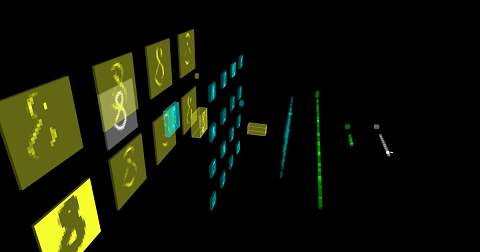

**Activation maps** are called feature maps since they store one feature from the image, these features are hierarchical within the images and within the convolutional neural networks (CNN) 

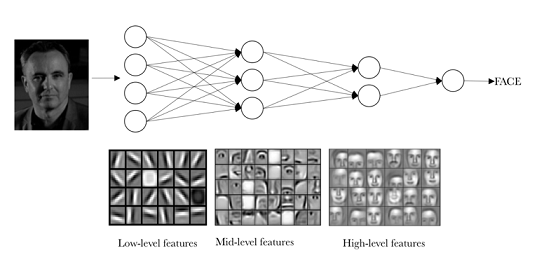

# **Zero Padding**

In order to achieve an output feature map with the same size of the input we can adopt the **padding** option, wich means adding 0 all around the image. In Conv2D in Keras, padding option can have two different values: 

1) "valid" meaning no padding

2) "same" meaning applying a padding in order to have an output with the same width and height for the input. Default value is "valid". 

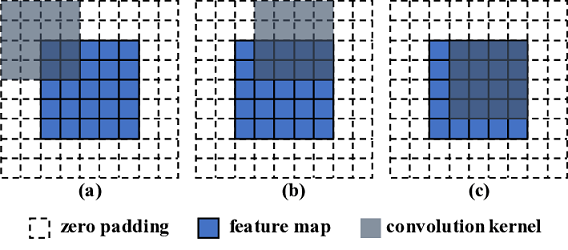

# **Stride**

**Stride** is the distance between centers of two consecutive convolutionary windows and it is a convolution hyper-parameter. **Stride 2** means height and width of the feature map are subsampled of a factor **2**. In practice, convolutions with more than stride 1 are not used in general, even though they are useful for some specific models. In order to subsample the feature map we generally adopt the max-pooling layer. 

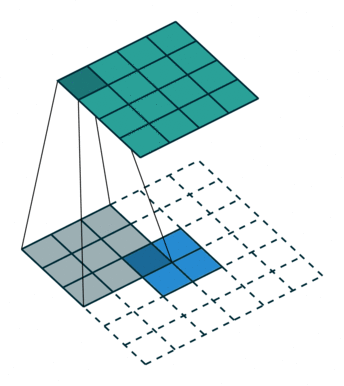

# **Max-Pooling Layer**

They are similar to Convolutional Layers, but instead of applying linear transformations to local patches by SGD (into the convolutional kernels), they are transformed by a **max operation executed on all over the window onto the tensors**. The biggest difference with regard to convolutions, is that **Max-Pooling** operates on 2x2 windows at least, so stride 2. On the other hand, a Convolution is typically performed with 3x3 windows, which are the minimum needed to understand the minimum concepts: up, down, left and right.

Briefly, the purpose of subsampling with pooling layers, is to reduce the mapping's number of coefficients which must be processed, and also to introduce spatial hierarchies, enabling the model to consider bigger and bigger windows within the last convolutional layers. For instance, it is impossible to recognize a digit (from Mnist) by a 7x7 pixels window. 

We can also adopt **Average-Pooling** where every input window patch is averaged, however max-pooling tends to work better, since generally feature maps encode the spatial presence of a certain pattern or concept throughout all the feature maps (that's why activation maps are also called feature maps). Hence it is more informatively significant evaluate the max presence of features rather than the average presence. Average pooling tends to dilute the information related to the presence of the features.  

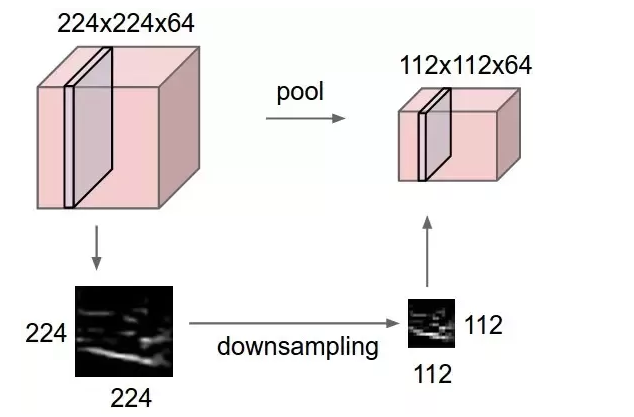

# **Other Different Convolutions in Deep Learning**

there are other different types of convolutional layers in deep learning according to the way they consider and pick up the input spatially 

# **Dilated Convolutions or also called Atrous Convolutions** 

In the **Dilated Convolutions** we have another new hyper-parameter: the dilation rate. Dilation rate represents the space rate among the values within the Receptive Field as well as the Kernel. For instance, a 3x3 kernel (and receptive field) with a dilation rate of 2 will have the same receptive field and kernel size as a 5x5 kernel, but they are only using 9 parameters such as a dense 3x3 kernel. This determines a wider receptive field. Dilated convolutions are particularly popular with the segmentation models for real-time semantic  segmentation, we make use of them all the times we want a wide receptive field and we want to reduce the number of multiple convolutions or larger kernels.

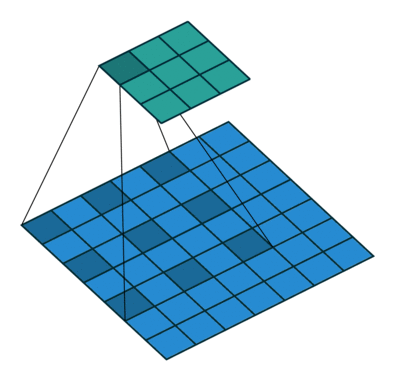

In order to adopt Dilated Convolutions in keras you must use the following parameter in the layer Conv2D: 

***dilation_rate:*** 	an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.

**Example:**
y = *tf.keras.layers.Conv2D*(2, 3, activation='relu', dilation_rate=2, input_shape=input_shape[1:])(x)

# **Transposed Convolutions alias Deconvolutions or Fractionally Strided Convolutions**

**Deconvolution**

Even though they are not **deconvolutions** sometimes they are called with this name. Actually, a deconvolution is the reverse of the convolution operator, for instance put and image into a single convolutional layer, take the output explore the black box (there are some techniques that we'll see) and get your original image back, this is the deconvolution. In other terms, Deconvolutiont is the mathematical inverse of Convolutional.


**Transposed Convolution**

A **transposed** convolution is somewhat similar because it produces the same spatial resolution of an hypothetical deconvolutional layer would. However, the actual mathematical operation that’s being performed on the values is different. A transposed convolutional layer yields a regular convolution but reverts its spatial transformation.

Let's make an example: An image of 5x5 is inputted into a convolutional layer, with stride 2, no padding and the kernel  size is 3x3. This will generate 2x2 image. In order to reverse this process, we need the inverse mathematical operation so that 9 values are generated from each pixel we input. Afterward, we traverse the output image with a stride of 2. This would be a **deconvolution**.

A **transposed** convolution does not do the same. The only thing in common is it guarantees that the output will be a 5x5 image such as in the deconvolution, but it still performs a normal convolution operation. In order to achieve this, we need to perform some fancy padding on the input. This process merely reconstructs the spatial resolution from before and performs a convolution. This may not be the mathematical inverse, but it is very used for Encoder-Decoder architectures. This way we can combine the upscaling of an image with a convolution, instead of doing two separate processes.

The need for transposed convolutions generally arises from the desire to use a transformation going in the opposite direction of a normal convolution, i.e., from something that has the shape of the output of some convolution to something that has the shape of its input while maintaining a connectivity pattern that is compatible with said convolution

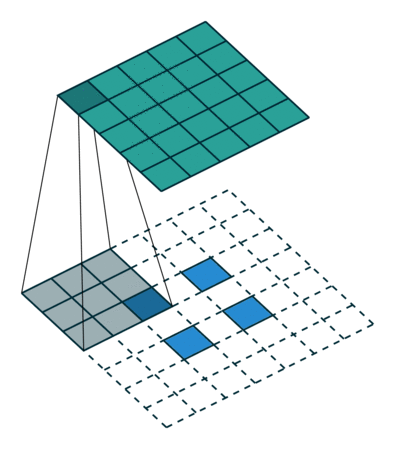

**Example:** model.add(*Conv2DTranspose*(1, (1,1), strides=(2,2), input_shape=(2, 2, 1)))

# **Separable Convolutions**

A **separable** convolution consists in splitting the kernel activation operation into multiple stages. Let’s consider a convolution as y = conv(x, k) where y is the output image, x is the input image, and k is the kernel. Therefore, k can be calculated by: k = k1.dot(k2). This would make it a separable convolution because instead of calculating a 2D convolution with k, we could get to the same result by doing 2 1D convolutions with k1 and k2.

Let's consider the "**Sobel**" kernel which is often adopted for image processing: 

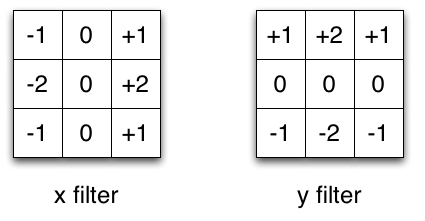

You could get the same kernel by multiplying the vector [1, 0, -1] and [1,2,1].T. This would require 6 instead of 9 parameters while doing the same operation. The example above shows what’s called a spatial separable convolution.

 Actually, one can create something very similar to a spatial separable convolution by stacking a 1xN and a Nx1 kernel layer. This was recently used in an architecture called Efficient Nets showing promising results.

There is another type of separable convolution that is called: **depthwise separable convolution**. This will perform a spatial convolution while keeping the channels separate and then follow with a depthwise convolution. For example, in a normal situation, if we have a 3x3 convolutional layer on 16 input channels and 32 output channels. What happens in detail is that every of the 16 channels is traversed by 32 3x3 kernels resulting in 512 (16x32) feature maps. Next, we merge 1 feature map out of every input channel by adding them up. Since we can do that 32 times, we get the 32 output channels we wanted.
For a depthwise separable convolution on the same example, we traverse the 16 channels with 1 3x3 kernel each, giving us 16 feature maps. Now, before merging anything, we traverse these 16 feature maps with 32 1x1 convolutions each and only then start to them add together. This results in 656 (16x3x3 + 16x32x1x1) parameters opposed to the 4608 (16x32x3x3) parameters from above. The example is a specific implementation of a depthwise separable convolution where the so called depth multiplier is 1. This is by far the most common setup for such layers.
We do this because of the hypothesis that spatial and depthwise information can be decoupled. Depthwise separable convolutions are used in the **Xception** model and it works very well! Depthwise separable convolutions are also used for mobile devices because of their efficient use of parameters.

According to Keras Documentation: "Depthwise convolution is a type of convolution in which each input channel is convolved with a different kernel (called a depthwise kernel). You can understand depthwise convolution as the first step in a depthwise separable convolution.
It is implemented via the following steps:

1) Split the input into individual channels.

2) Convolve each channel with an individual depthwise kernel with depth_multiplier output channels.

3) Concatenate the convolved outputs along the channels axis.
Unlike a regular 2D convolution, depthwise convolution does not mix information across different input channels."

**Example**:  model.add(*DepthwiseConv2D*(
                depth_multiplier=depth_multiplier,
                kernel_size=(kernel_height, kernel_width),
                input_shape=input_shape,
                padding="valid",
                strides=(1, 1),
            )
        )

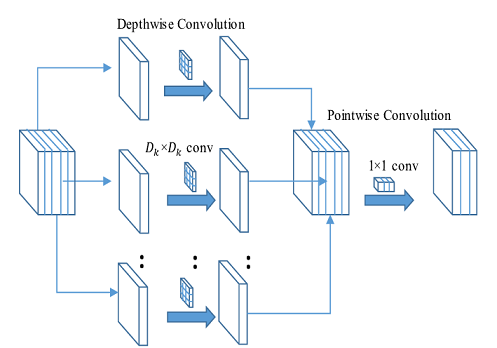

# **Deep Learning for Small Datasets with Unveiling of the Black Box alias ConvNets are not so Black-Box as many people say**

In many cases, we need to feed an image classifier using only very few data. Let's consider the classification of "dogs" and "cats", in a dataset containing 4000 pictures of **cats** and **dogs** (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing.

# All imports

In [30]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os
import platform
import timeit

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, Model, load_model 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=Warning)

# All Functions Definition

In [31]:
def data_download(file_to_download, gdrive_code, OS):
  if not os.path.exists(file_to_download):
    os.system('gdown --id "'+gdrive_code+'" --output '+file_to_download)
    if OS == "Linux":
        os.system('unzip -o -n "./'+file_to_download+'" -d "./"')

# All Downloads

In [32]:
start_time = timeit.default_timer()
# Operating System
OS = platform.system()                           # returns 'Windows', 'Linux', etc

os.system('pip install --upgrade --no-cache-dir gdown')

data_download("./cats_and_dogs_small.zip", "1jcSSoGmeHTlpyTjiEf5cxAr8d_uLnrHI", OS)

print("Elapsed Time: ", timeit.default_timer() - start_time)

Elapsed Time:  2.5309578040000815


# All Globals 

In [33]:
save_best_model = True
early_stopping = False
log = True
R_LR_P = False
default_callbacks = []
train_dir = "/content/cats_and_dogs_small/train"
validation_dir = "/content/cats_and_dogs_small/validation"
test_dir = "/content/cats_and_dogs_small/test"

# Pre-processing

Images are rescaled by 1./255 with ImageDataGenerator instead of classical **Normalization** formula

ImageDataGenerator is very strong since it can quickly arrange Python generators that can automatically load image files from disk into batches of pre-processed tensors. **Target_size** automatically resizes images to 150x150, whereas **flow_from_directory** sets the batch_size and, since we use binary_crossentropy loss, it automatically arranges binary labels




In [34]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Data Inspection

In [35]:
i = 0
for data_batch, labels_batch in train_generator:
    
    print('Shape of each data batch:', data_batch.shape)
    print('Shape of each label batch:', labels_batch.shape)
    break
    '''
    if i>4:
      break
    else: 
      i+=1
    '''

Shape of each data batch: (20, 150, 150, 3)
Shape of each label batch: (20,)


# Model Definition

Since this is a **binary classification**, we need only one output with sigmoid to normalize within [0,1]



Since we are addressing a complex problem with big images, let's build our network larger: it will have one more Conv2D + MaxPooling2D. This will improve the capability of the CNN to further reduce the size of the feature maps, so that they aren not too huge when we have the Flatten layer. In other terms,  we start from 150x150 inputs and we end up with 7x7 feature maps before the Flatten layer.

You can notice a rule that we already said and we are going to repeat here: 

1) The **depth** of the feature maps is **doubling** through the network, namely from 32 to 128

2) The **size** of the feature maps is **decreasing**, namely from 148x148 (calculated by Keras through the formula (W(or H)-F+2P)/S+1) to 7x7. 

This is a schema that you will see in almost all CNNs, since (1) increases the number of features extracted and managed by the network whereas (2) forces the network to have more abstract feature representations on the top of the network (last layers). That's why CNNs are typically **Funnel-shaped** and they include the so called "**bottlenecks**" inside. 

In [36]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

# Model Compiling

In [37]:
solver = RMSprop(lr=1e-4)
model.compile(optimizer = solver, loss = "binary_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# Callbacks Definition


In [38]:
if save_best_model: 
  check_point = ModelCheckpoint("cats_and_dogs_best.h5", save_weights_only = False, monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = "max")
  default_callbacks = default_callbacks + [check_point]

if early_stopping: 
  earlyStopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 0, mode = 'min') 
  default_callbacks = default_callbacks + [earlyStopping]

if log: 
  csv_logger = CSVLogger('history.log')
  default_callbacks = default_callbacks + [csv_logger]

if R_LR_P: 
  reduce_lr_plateau = ReduceLROnPlateau(factor=0.1, patience=3, verbose=1, min_lr=1e-06, min_delta=0.01)
  default_callbacks = default_callbacks + [reduce_lr_plateau]


# Model Training

By now, we need to train the model by using the fit_generator method which is the same of .fit for data generators. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. Because the data is being generated endlessly, the generator needs to know, for example, how many samples to draw from the generator before declaring an epoch over, this is done by the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator, i.e. after having run for steps_per_epoch gradient descent steps, the fitting process will go to the next epoch. In our case, batches are 20-sample large, so it will take 100 batches until we see our target of 2000 elements.

When using fit_generator, one may pass a validation_data argument, much like with the fit method. Importantly, this argument is allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly, and thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [39]:
print(type(train_generator))
print(type(validation_generator))
print(type(test_generator))


<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'keras.preprocessing.image.DirectoryIterator'>


In [40]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, 
      callbacks = default_callbacks)

model.save('cats_and_dogs_last_1.h5')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.5225
Epoch 1: val_accuracy improved from -inf to 0.50800, saving model to cats_and_dogs_best.h5
100/100 [==============================] - 22s 88ms/step - loss: 0.6947 - accuracy: 0.5225 - val_loss: 0.6869 - val_accuracy: 0.5080
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.6637 - accuracy: 0.5985
Epoch 2: val_accuracy improved from 0.50800 to 0.61600, saving model to cats_and_dogs_best.h5
100/100 [==============================] - 9s 88ms/step - loss: 0.6637 - accuracy: 0.5985 - val_loss: 0.6558 - val_accuracy: 0.6160
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.6298 - accuracy: 0.6575
Epoch 3: val_accuracy did not improve from 0.61600
100/100 [==============================] - 9s 87ms/step - loss: 0.6298 - accuracy: 0.6575 - val_loss: 0.6473 - val_accuracy: 0.6140
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.5913 - accuracy: 0

In [28]:
!nvidia-smi 

Mon Mar 14 19:48:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |    334MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Training History Visualization

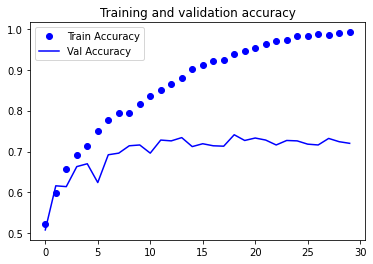

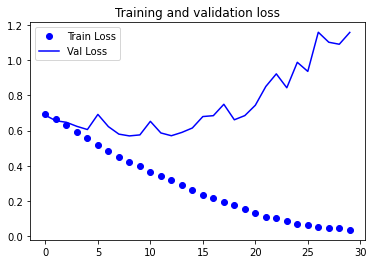

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Val Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("accuracies.jpg")
plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("losses.jpg")
plt.show()

**This model is clearly overfitting!**

Let's use Data Augmentation to see whether we can reduce the overfitting issue due to the small dataset. 

# Data Augmentation 

**rotation_range:**	Int. Degree range for random rotations.

**width_shift_range:**	Float, 1-D array-like or int
float: fraction of total width, if < 1, or pixels if >= 1.
1-D array-like: random elements from the array.
int: integer number of pixels from interval (-width_shift_range, +width_shift_range)
With width_shift_range=2 possible values are integers [-1, 0, +1], same as with width_shift_range=[-1, 0, +1], while with 
width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).

**height_shift_range:**	Float, 1-D array-like or int
float: fraction of total height, if < 1, or pixels if >= 1.
1-D array-like: random elements from the array.
int: integer number of pixels from interval (-height_shift_range, +height_shift_range)
With height_shift_range=2 possible values are integers [-1, 0, +1], same as with height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).


**shear_range:**	Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)

**zoom_range:**	Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].

**horizontal_flip:**	Boolean. Randomly flip inputs horizontally.

**fill_mode:**	One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:

'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)

'nearest': aaaaaaaa|abcd|dddddddd

'reflect': abcddcba|abcd|dcbaabcd

'wrap': abcdabcd|abcd|abcdabcd

In [41]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Augmented Data Inspection

This is module with image preprocessing utilities

We pick one image to "augment", read the image and resize it,convert it to a Numpy array with shape (150, 150, 3) and reshape it to (1, 150, 150, 3) for CNN. 

Then the **.flow()** command below generates batches of randomly transformed images. It will loop indefinitely, so we need to `break` the loop at some point! We plot only 4 images. 


In [43]:
# correct this at home, exercise
fnames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]
img_path = fnames[3]
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

IndexError: ignored

# New Model Definition

To further reduce overfitting, we will also add a Dropout before the densely-connected classifier

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# New Model Compiling

In [45]:
solver = RMSprop(lr=1e-4)
model.compile(optimizer = solver, loss = "binary_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# Data Agumentation and New Model Training

**Note:** the validation data should not be augmented!


In [47]:
# correct at home 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, 
      callbacks = default_callbacks)

model.save('cats_and_dogs_last_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
 63/100 [=================>............] - ETA: 8s - loss: 0.6869 - accuracy: 0.5430WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 3000 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy did not improve from 0.74100
100/100 [==============================] - 18s 181ms/step - loss: 0.6869 - accuracy: 0.5430 - val_loss: 0.6755 - val_accuracy: 0.5900


# New Model Training History Visualization

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("da_accuracies.jpg")
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("da_losses.jpg")
plt.show()

# Feature Maps Visualization: Do not trust the other ones! CNNs are not so Black Box!

We preprocess the image into a 4D tensor

The model was trained on inputs that were preprocessed normalizing them, so we need to normalize the test set as well. Its shape will be (1, 150, 150, 3)

Then we extract the outputs of the top 8 layers and create a model that will return these outputs, given the model input. 





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

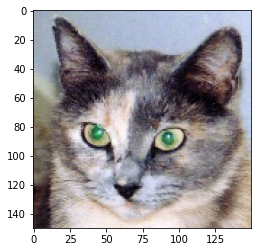

In [48]:
name_of_the_model_to_inspect = "cats_and_dogs_last_1.h5"
test_img_path = '/content/cats_and_dogs_small/test/cats/cat.1700.jpg'

model = load_model(name_of_the_model_to_inspect)
model.summary()

img = load_img(test_img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [52]:
print(type(layer_outputs))
print(layer_outputs)
print(type(activation_model))

<class 'list'>
[<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d_4')>, <KerasTensor: shape=(None, 72, 72, 64) dtype=float32 (created by layer 'conv2d_5')>, <KerasTensor: shape=(None, 36, 36, 64) dtype=float32 (created by layer 'max_pooling2d_5')>, <KerasTensor: shape=(None, 34, 34, 128) dtype=float32 (created by layer 'conv2d_6')>, <KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'max_pooling2d_6')>, <KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_7')>, <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'max_pooling2d_7')>]
<class 'keras.engine.functional.Functional'>


# Activations Extraction

This will return a list of 8 Numpy arrays, one array per layer activation


In [54]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


# Feature Map 3 Plotting

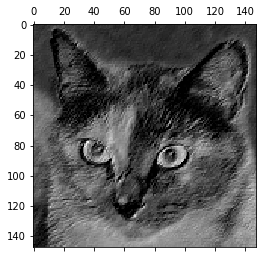

In [58]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='gray') # Viridis, percptual uniform colormap
plt.show()

# Feature Map 30 Plotting

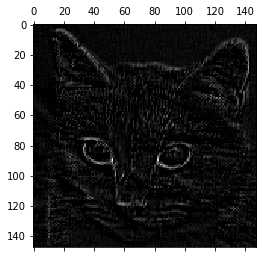

In [59]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='gray')
plt.show()

# Visualization of all Feature Maps

We extract the names of the layers, so can have them as part of our plot
Then we have the number of features. The feature map has shape (1, size, size, n_features). The we loop on the the activation channels in this matrix and we plot them into a grid. 



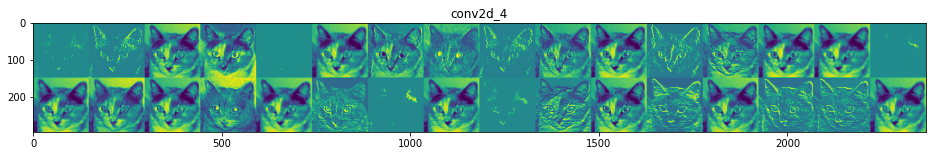

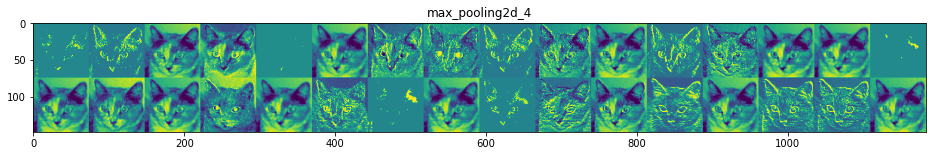

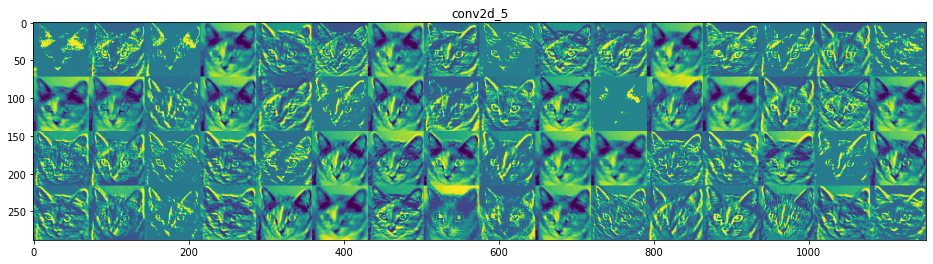

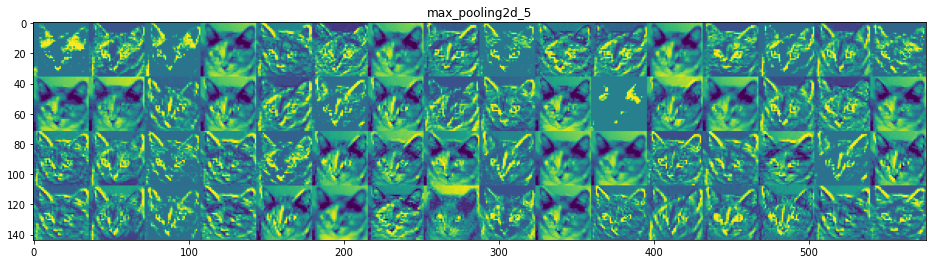

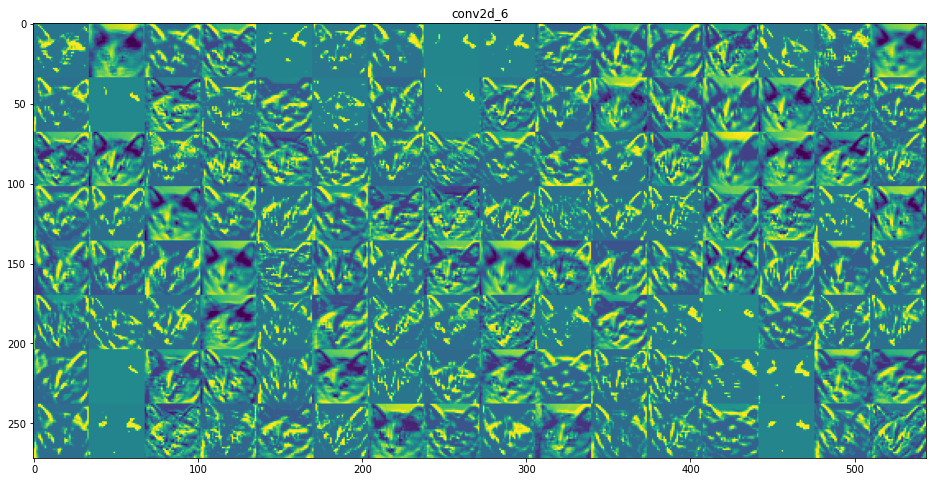

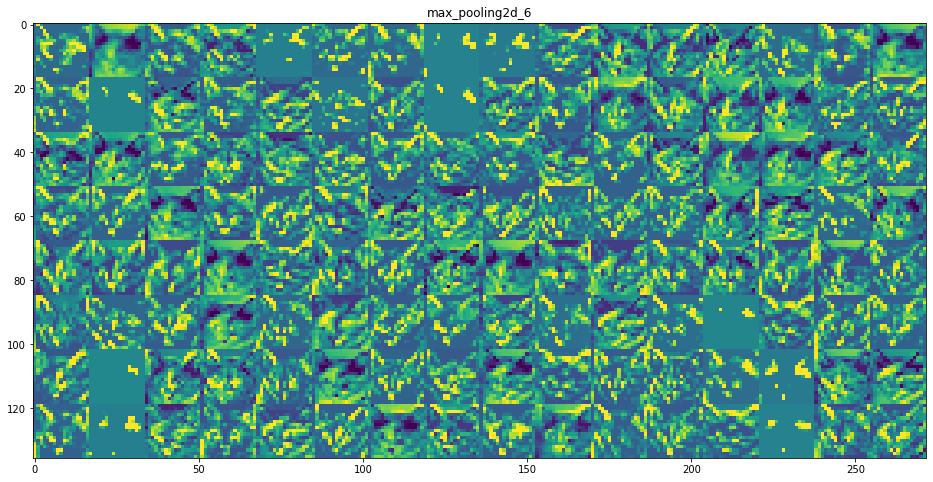

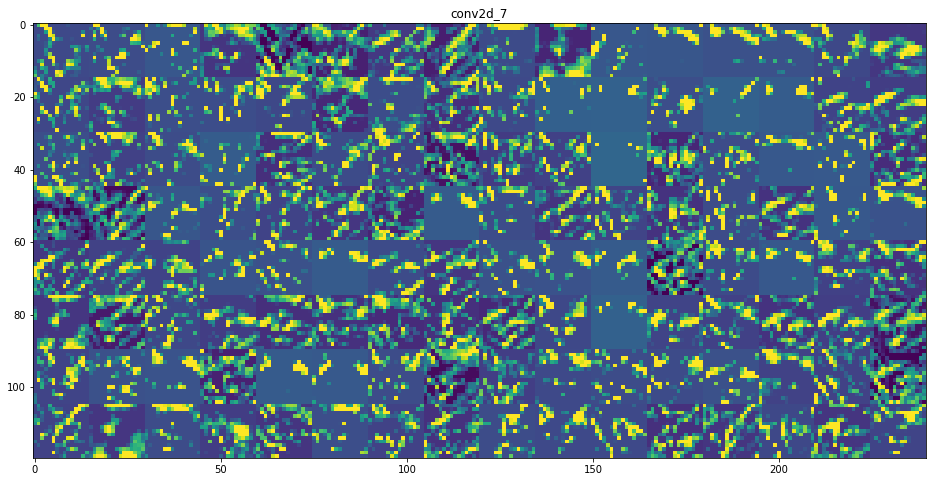

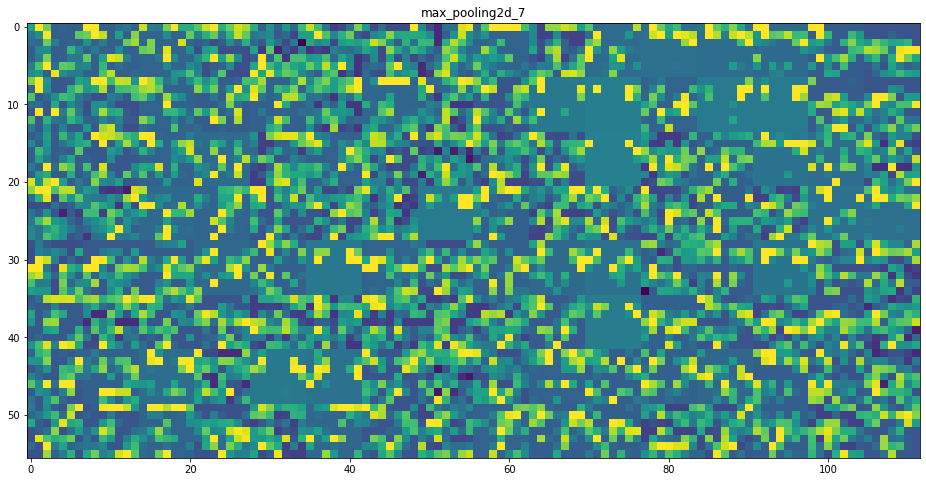

In [60]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()

# Homeworks

1) Try the same processing with another computer vision binary dataset you choose. 

Hint: look for it on UCI Machine Learning website

2) Analyze feature maps and plot them 

3) Try the best regularizations and accuracies for the new binary dataset

4) Plot also last flatten and dropout 